# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_WD1036_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_WD1036_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_WD1036_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_WD1036_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:15.808000,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:17.228063,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:18.648126,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:20.068189,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:21.488251,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:02:58.878000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,12,L4,None,True
1495,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:04:41.281000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,13,L4,None,True
1496,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:06:23.683000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,14,L4,None,True
1497,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:08:06.085000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_WD1036_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     153   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP010    1 TableHDU        51   13R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP010    1 TableHDU        51   13R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   


Then we plot the science frame using the `sparc4.product_plots` library

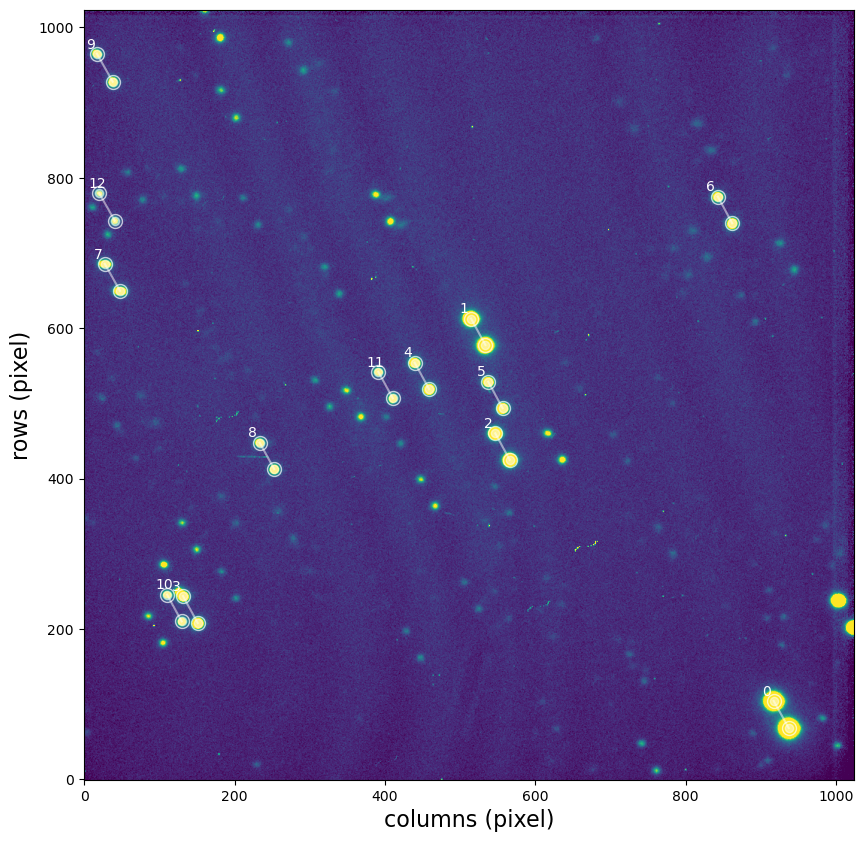

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,159.690417,-20.717745,937.014256,68.148553,7.686580,7.686580,-10.754777,0.000731,-9.343749,0.000665,10,0
1,1,159.731956,-20.670779,533.658534,577.613968,7.995797,7.995797,-9.623857,0.001493,-9.353938,0.000611,10,0
2,2,159.728326,-20.685025,565.853618,425.053621,7.926491,7.926491,-8.899730,0.002541,-9.353076,0.000630,10,0
3,3,159.769178,-20.705988,151.065707,207.898879,7.419538,7.419538,-8.285272,0.004140,-9.345333,0.000645,10,0
4,4,159.739274,-20.676395,458.737211,518.972449,7.982840,7.982840,-7.909943,0.005603,-9.351479,0.000600,10,0
5,5,159.729447,-20.678613,556.484883,493.621411,7.969378,7.969378,-7.898346,0.005804,-9.353030,0.000687,10,0
6,6,159.699661,-20.655040,861.834068,739.507358,8.539047,8.539047,-7.607305,0.007254,-9.345215,0.000614,10,0
7,7,159.780739,-20.664756,47.663462,649.657907,9.495158,9.495158,-7.396676,0.008742,-9.345125,0.000630,10,0
8,8,159.759559,-20.686691,252.734485,412.588321,7.544765,7.544765,-7.325137,0.009159,-9.348090,0.000571,10,0
9,9,159.782535,-20.638589,37.998488,927.801803,8.377129,8.377129,-7.248889,0.010001,-9.343457,0.000651,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

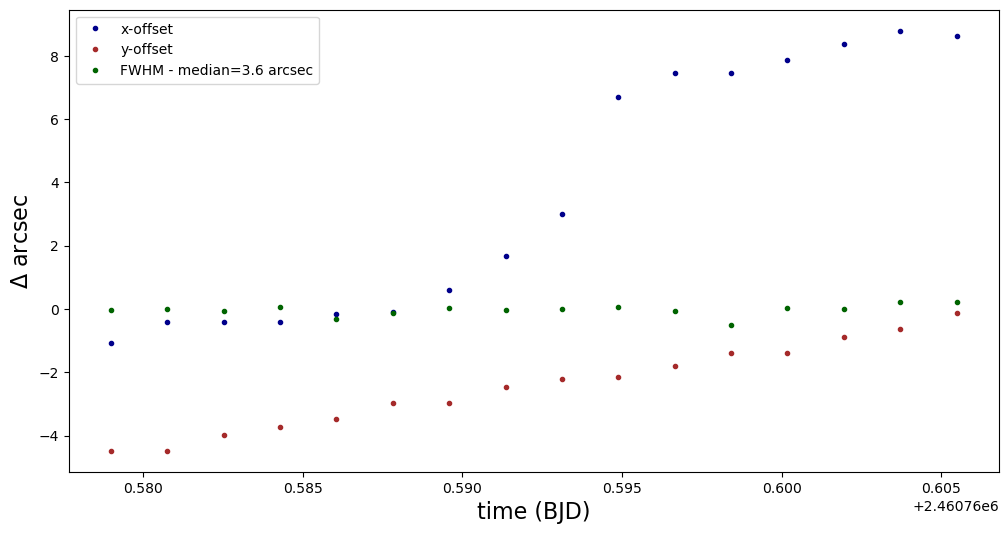

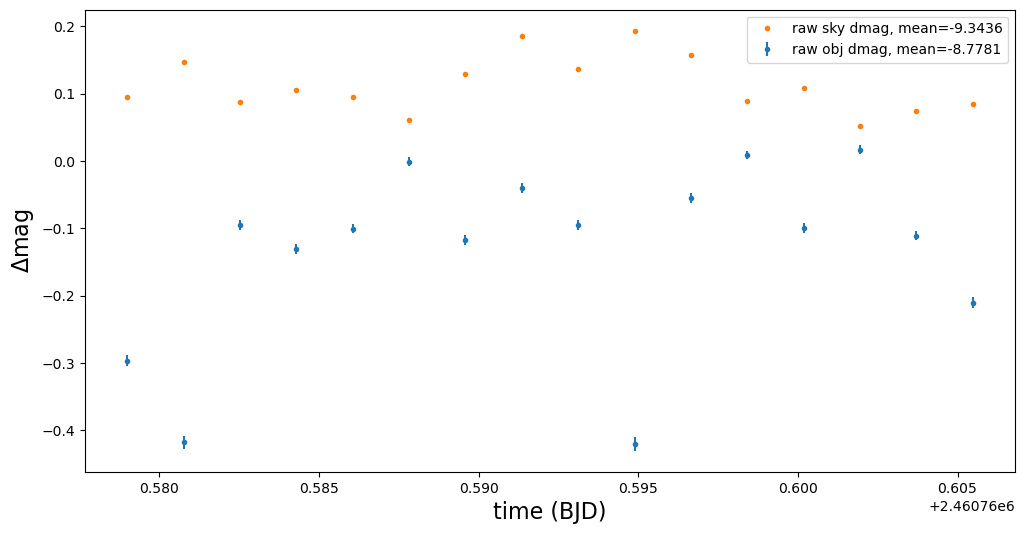

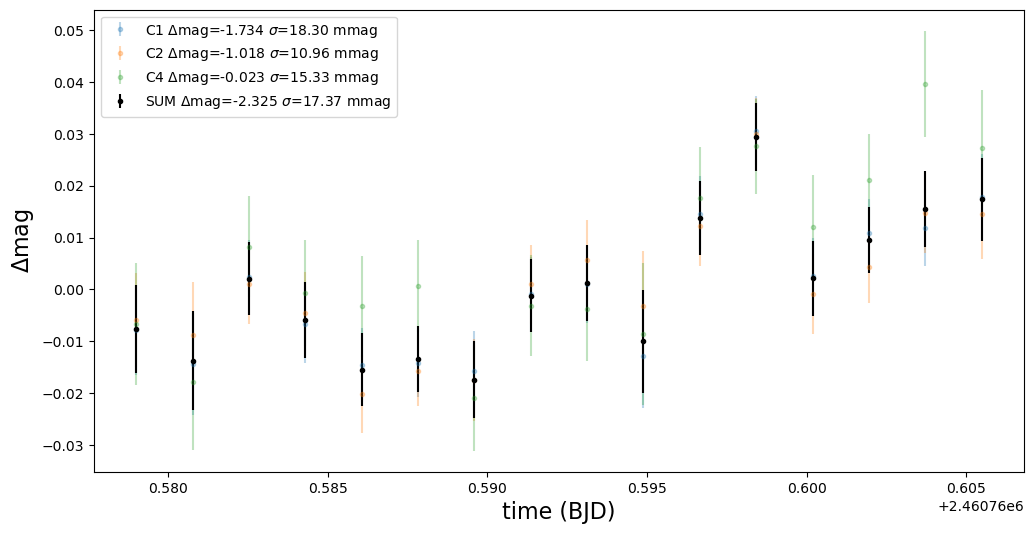

       TIME                x         ...       diffmagsum      
------------------ ----------------- ... ----------------------
2460760.5789980623 546.9190664916401 ...  -0.007666778070809066
 2460760.580764504 548.9190664916401 ...  -0.013747991569494467
2460760.5825280296 548.9190664916401 ...   0.002086068161943011
2460760.5842948533 548.9190664916401 ...  -0.005935798749340471
 2460760.586058472 549.6690664916401 ...  -0.015511187968216156
 2460760.587824392 549.9190664916401 ...  -0.013408413740047642
2460760.5895886007 551.9190664916401 ...  -0.017428948204098127
 2460760.591355644 555.1690664916401 ... -0.0012082659990513278
2460760.5931221438 559.1690664916401 ...  0.0012082659990513278
2460760.5948869423 570.1690664916401 ...  -0.010018508284146854
 2460760.596650803 572.4190664916401 ...   0.013695025626522472
 2460760.598414698 572.4190664916401 ...    0.02948069809929965
2460760.6001808858 573.6690664916401 ...   0.002123189637074141
2460760.6019447926 575.1690664916401 ...

In [9]:
catalog = 'CATALOG_PHOT_AP010'
target=5
comps=[1,2,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [10]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_WD1036_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   ()      
  1  POLARIMETRY_AP010    1 BinTableHDU    210   13R x 99C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


Below we print one of the catalog extensions

In [12]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0013,EFE0013,FO0014,EFO0014,FE0014,EFE0014,FO0015,EFO0015,FE0015,EFE0015
0,0.0,10.0,0.0,159.690417,-20.717745,916.974887,104.341685,937.014256,68.148553,7.556565,...,29043.021609,20.367605,20055.560712,18.735425,25818.689526,20.058945,18296.819426,18.570740,23468.492722,19.659926
1,0.0,10.0,1.0,159.731956,-20.670779,514.482816,612.822780,533.658534,577.613968,7.882695,...,9699.572386,16.705596,7116.905682,15.950795,8582.147146,16.887869,6418.750341,16.185218,7826.420695,16.637095
2,0.0,10.0,2.0,159.728326,-20.685025,546.724989,460.187550,565.853618,425.053621,7.756013,...,5089.926169,15.291359,3631.654629,15.966115,4463.560312,15.200123,3312.846122,15.721819,4075.637194,15.207747
3,0.0,10.0,3.0,159.769178,-20.705988,131.386048,243.722097,151.065707,207.898879,7.463592,...,2345.310876,14.805235,2022.465565,15.776560,2089.839278,14.907005,1847.794052,15.751037,1897.210706,15.132403
4,0.0,10.0,4.0,159.739274,-20.676395,439.532839,554.195214,458.737211,518.972449,7.626476,...,1998.881499,14.623536,1421.760108,14.879005,1742.256120,14.852959,1293.259700,14.851389,1626.850247,14.759340
5,0.0,10.0,5.0,159.729447,-20.678613,537.353250,528.795645,556.484883,493.621411,7.688687,...,1905.158657,15.175608,1479.770216,15.245592,1733.088706,15.214972,1301.640699,15.204673,1629.831501,15.376150
6,0.0,10.0,6.0,159.699661,-20.655040,842.685523,774.992698,861.834068,739.507358,7.924544,...,1538.571679,14.547680,1095.008673,14.773492,1351.857672,15.002072,995.655783,15.110382,1222.794783,15.048960
7,0.0,10.0,7.0,159.780739,-20.664756,27.384464,685.643026,47.663462,649.657907,8.491064,...,1216.474435,14.280902,867.866257,15.140370,1029.055766,14.861667,807.239995,14.989440,979.326137,14.854823
8,0.0,10.0,8.0,159.759559,-20.686691,233.310909,447.920261,252.734485,412.588321,7.273859,...,1133.286956,14.274356,839.883797,14.210882,1001.079538,14.094508,756.087632,14.279934,927.944838,14.230745
9,0.0,10.0,9.0,159.782535,-20.638589,16.877524,965.132391,37.998488,927.801803,7.740959,...,1067.765135,15.021956,827.213107,15.248410,959.074649,15.153711,740.976606,15.419923,855.475274,15.050901


Then we can print all column names to check the data available in each catalog

In [14]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM', 'MAG', 'EMAG', 'SKYMAG', 'ESKYMAG', 'PHOTFLAG', 'Q', 'EQ', 'U',
       'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA', 'K', 'EK', 'ZERO',
       'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA', 'POLARFLAG', 'FO0000',
       'EFO0000', 'FE0000', 'EFE0000', 'FO0001', 'EFO0001', 'FE0001',
       'EFE0001', 'FO0002', 'EFO0002', 'FE0002', 'EFE0002', 'FO0003',
       'EFO0003', 'FE0003', 'EFE0003', 'FO0004', 'EFO0004', 'FE0004',
       'EFE0004', 'FO0005', 'EFO0005', 'FE0005', 'EFE0005', 'FO0006',
       'EFO0006', 'FE0006', 'EFE0006', 'FO0007', 'EFO0007', 'FE0007',
       'EFE0007', 'FO0008', 'EFO0008', 'FE0008', 'EFE0008', 'FO0009',
       'EFO0009', 'FE0009', 'EFE0009', 'FO0010', 'EFO0010', 'FE0010',
       'EFE0010', 'FO0011', 'EFO0011', 'FE0011', 'EFE0011', 'FO0012',
       'EFO0012', 'FE0012', 'EFE0012', 'FO0013', 'EFO0013', 'FE0013',
       'EFE0013', 'FO0014', 'EFO0014', 'FE0014', 'EFE0014', '

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-08-18 14:28:25,677 astropop - INFO - Normalization disabled.  [__init__]


2025-08-18 14:28:25,677 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-08-18 14:28:25,686 root - INFO - Source index: i=5   [pipeline_lib]


2025-08-18 14:28:25,686 | INFO | Source index: i=5 


2025-08-18 14:28:25,687 root - INFO - Source RA=159.7294468580617 Dec=-20.678612993700455 mag=-11.761+-0.002  [pipeline_lib]


2025-08-18 14:28:25,687 | INFO | Source RA=159.7294468580617 Dec=-20.678612993700455 mag=-11.761+-0.002


2025-08-18 14:28:25,687 root - INFO - Best aperture radius: 10.0 pixels  [pipeline_lib]


2025-08-18 14:28:25,687 | INFO | Best aperture radius: 10.0 pixels


2025-08-18 14:28:25,688 root - INFO - Polarization in Q: -0.013+-0.003  [pipeline_lib]


2025-08-18 14:28:25,688 | INFO | Polarization in Q: -0.013+-0.003


2025-08-18 14:28:25,689 root - INFO - Polarization in U: 0.020+-0.006  [pipeline_lib]


2025-08-18 14:28:25,689 | INFO | Polarization in U: 0.020+-0.006


2025-08-18 14:28:25,690 root - INFO - Polarization in V: 0.052+-0.003  [pipeline_lib]


2025-08-18 14:28:25,690 | INFO | Polarization in V: 0.052+-0.003


2025-08-18 14:28:25,691 root - INFO - Total linear polarization p: 0.024+-0.005  [pipeline_lib]


2025-08-18 14:28:25,691 | INFO | Total linear polarization p: 0.024+-0.005


2025-08-18 14:28:25,692 root - INFO - Angle of polarization theta: 61+-6 deg  [pipeline_lib]


2025-08-18 14:28:25,692 | INFO | Angle of polarization theta: 61+-6 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-08-18 14:28:25,693 root - INFO - Free constant k: 0.8293638330354987+-0.0  [pipeline_lib]


2025-08-18 14:28:25,693 | INFO | Free constant k: 0.8293638330354987+-0.0


2025-08-18 14:28:25,694 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-08-18 14:28:25,694 | INFO | Zero of polarization: 30.2+-0.0


2025-08-18 14:28:25,695 root - INFO - RMS of zi residuals: 0.008313982100108856  [pipeline_lib]


2025-08-18 14:28:25,695 | INFO | RMS of zi residuals: 0.008313982100108856


2025-08-18 14:28:25,696 root - INFO - Reduced chi-square (n=16.0, DOF=13.0): 1.47  [pipeline_lib]


2025-08-18 14:28:25,696 | INFO | Reduced chi-square (n=16.0, DOF=13.0): 1.47


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-08-18 14:28:25,784 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-08-18 14:28:25,784 | INFO | Substituting symbol \perp from STIXGeneral


2025-08-18 14:28:25,789 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-08-18 14:28:25,789 | INFO | Substituting symbol \perp from STIXGeneral


2025-08-18 14:28:26,017 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-08-18 14:28:26,017 | INFO | Substituting symbol \perp from STIXGeneral


2025-08-18 14:28:26,022 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-08-18 14:28:26,022 | INFO | Substituting symbol \perp from STIXGeneral


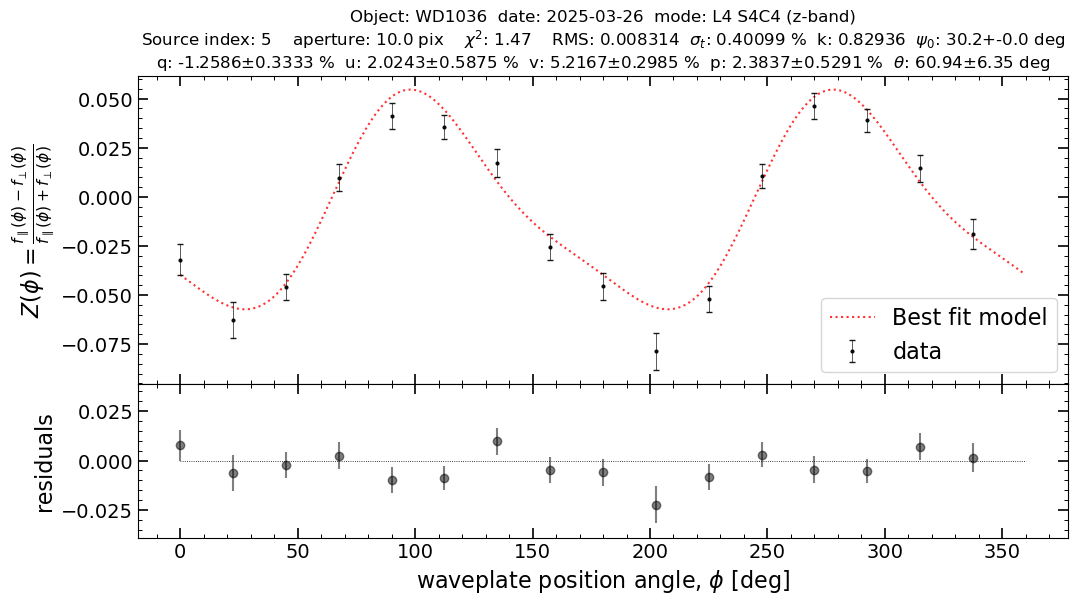

In [15]:
source_index = 5

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [16]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_WD1036_POLAR_L4_polar.fits
SOURCE_INDEX : 5
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 1
APERTURE_RADIUS : 10.0
NEXPS : 16
MAG : -11.761+-0.002
RA : 159.7294468580617
DEC : -20.678612993700455
FWHM : 7.688687175315993
X1 : 537.3532501873061
Y1 : 528.7956446424582
X2 : 556.4848827959742
Y2 : 493.62141111002995
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5]
ZI : [-0.032+-0.008, -0.063+-0.009, -0.046+-0.007, 0.010+-0.007, 0.041+-0.007,
 0.036+-0.006, 0.017+-0.007, -0.025+-0.007, -0.046+-0.007, -0.079+-0.009,
 -0.052+-0.007, 0.010+-0.006, 0.046+-0.007, 0.039+-0.006, 0.015+-0.007,
 -0.019+-0.007]
FO : [1180+-10, 1020+-10, 1400+-10, 1450+-20, 1540+-10, 1670+-10, 1480+-20,
 1510+-20, 1410+-20, 1000+-20, 1450+-20, 1640+-20, 1550+-20, 1710+-20,
 1480+-20, 1300+-20]
FE : [1520+-10, 1400+-20, 1860+-20, 17

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [17]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 2.4+-0.5 %  Angle of polarization: 61+-6 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [18]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

,TIME,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,MAG,...,ETHETA,K,EK,ZERO,EZERO,NOBS,NPAR,CHI2,RMS,TSIGMA
0,2.460761e+06,0.0,159.690417,-20.717745,916.974887,104.341685,937.014256,68.148553,7.556565,-14.659664,...,10.495308,0.780443,0.0,30.2,0.0,16.0,3.0,3.222849,0.001063,0.0
1,2.460761e+06,1.0,159.731956,-20.670779,514.482816,612.822780,533.658534,577.613968,7.882695,-13.494132,...,13.007542,0.823384,0.0,30.2,0.0,16.0,3.0,1.670439,0.001840,0.0
2,2.460761e+06,2.0,159.728326,-20.685025,546.724989,460.187550,565.853618,425.053621,7.756013,-12.778126,...,6.854909,0.805104,0.0,30.2,0.0,16.0,3.0,0.820310,0.002390,0.0
3,2.460761e+06,3.0,159.769178,-20.705988,131.386048,243.722097,151.065707,207.898879,7.463592,-12.050580,...,11.136879,0.970661,0.0,30.2,0.0,16.0,3.0,0.611646,0.003660,0.0
4,2.460761e+06,4.0,159.739274,-20.676395,439.532839,554.195214,458.737211,518.972449,7.626476,-11.777397,...,22.966324,0.819301,0.0,30.2,0.0,16.0,3.0,1.031541,0.006076,0.0
5,2.460761e+06,5.0,159.729447,-20.678613,537.353250,528.795645,556.484883,493.621411,7.688687,-11.760685,...,6.347977,0.829385,0.0,30.2,0.0,16.0,3.0,1.472005,0.008319,0.0
6,2.460761e+06,6.0,159.699661,-20.655040,842.685523,774.992698,861.834068,739.507358,7.924544,-11.490548,...,17.712528,0.794092,0.0,30.2,0.0,16.0,3.0,1.481135,0.009752,0.0
7,2.460761e+06,7.0,159.780739,-20.664756,27.384464,685.643026,47.663462,649.657907,8.491064,-11.239726,...,103.827140,0.846397,0.0,30.2,0.0,16.0,3.0,0.492711,0.007088,0.0
8,2.460761e+06,8.0,159.759559,-20.686691,233.310909,447.920261,252.734485,412.588321,7.273859,-11.178502,...,14.355653,0.845556,0.0,30.2,0.0,16.0,3.0,0.585267,0.007837,0.0
9,2.460761e+06,9.0,159.782535,-20.638589,16.877524,965.132391,37.998488,927.801803,7.740959,-11.112220,...,17.808667,0.841783,0.0,30.2,0.0,16.0,3.0,0.699914,0.010451,0.0


In [19]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

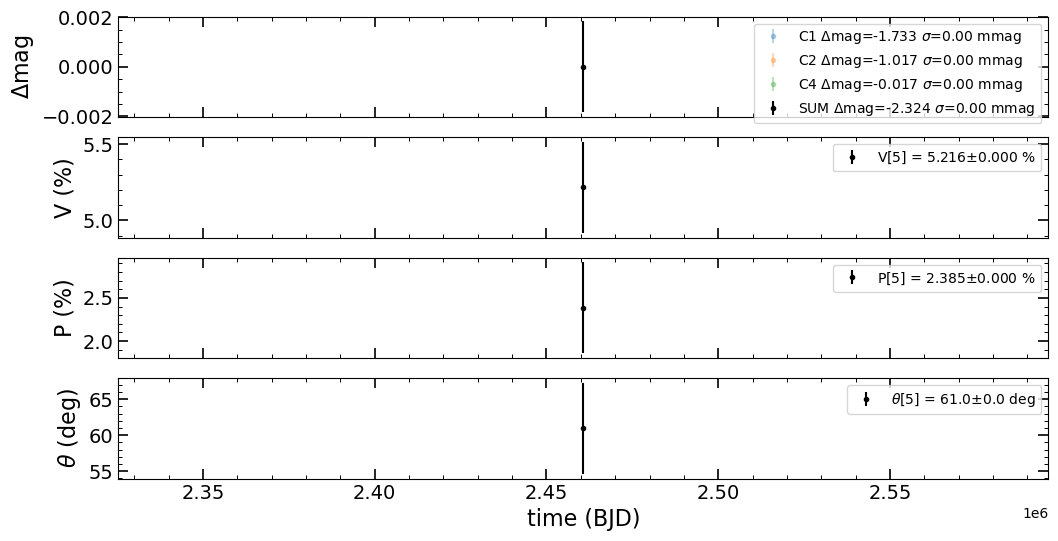

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.0018921589409988159,0.0,0.001989437747246193,0.0,0.0025671538395843625,2460760.593105739,537.3532501873061,528.7956446424582,556.4848827959742,493.62141111002995,7.688687175315993,-11.760685088399809,0.0018480322671416555,-14.084757889486237,0.0019704662044989054,0.0,0.02384557606288141,0.005292698395328998,60.9526479669487,6.347977239352054


In [20]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=5, 
                             comps=[1,2,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)